# Churn Prediction

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [3]:
train_data = pd.read_csv('Dataset/train.csv')
test_data = pd.read_csv('Dataset/test.csv')
train_data.head()
train_data['Churn'].value_counts()

Churn
0    199605
1     44182
Name: count, dtype: int64

In [106]:
def getThresholdValue(df,var):
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    inter_quantile_range = q3-q1
    lowerLimit = q1-1.5*inter_quantile_range
    upperLimit = q3+1.5*inter_quantile_range
    return lowerLimit,upperLimit
    
def outlierChecker(df,var):
    lower,upper=getThresholdValue(df,var)
    if df[(df[var]>upper) | (df[var]<lower)].shape[0]>0:
        return True
    else:
        return False
def fixOutlier(var):
    lower,upper=getThresholdValue(train_data,var)
    train_data.loc[train_data[var]<lower,var]=lower
    train_data.loc[train_data[var]>upper,var]=upper
        
# print(train_data["AccountAge"])
# print(outlierChecker(train_data,"AccountAge"))

num_var = [i for i in train_data.columns if ((train_data[i].dtypes in ["int64","float64"]) and i!="Churn")]

def printOuliers(df):
    for i in num_var:
        print(i," ",outlierChecker(df,i))
print(printOuliers(train_data))

for i in num_var:
    if outlierChecker(train_data,i):
        fixOutlier(i) 
        
print(printOuliers(train_data))
# if their is no outlier then no need of standard scaler

AccountAge   False
MonthlyCharges   False
TotalCharges   False
ViewingHoursPerWeek   False
AverageViewingDuration   False
ContentDownloadsPerMonth   False
UserRating   False
SupportTicketsPerMonth   False
WatchlistSize   False
None
AccountAge   False
MonthlyCharges   False
TotalCharges   False
ViewingHoursPerWeek   False
AverageViewingDuration   False
ContentDownloadsPerMonth   False
UserRating   False
SupportTicketsPerMonth   False
WatchlistSize   False
None


In [5]:
train_data.isnull().any()
# print(train_data.isnull().sum())
# print(train_data.shape[0])
# print(train_data['AccountAge'].value_counts(),end="   ")
# print(train_data['MonthlyCharges'].value_counts(),end="   ")
# print(train_data['TotalCharges'].value_counts(),end="   ")
print(train_data['SubscriptionType'].value_counts(),end="   ")
print(train_data['PaymentMethod'].value_counts(),end="   ")
print(train_data['PaperlessBilling'].value_counts(),end="   ")
print(train_data['ContentType'].value_counts(),end="   ")
print(train_data['MultiDeviceAccess'].value_counts(),end="   ")
print(train_data['DeviceRegistered'].value_counts())
train_data.dtypes


cat_var = [i for i in train_data.columns if train_data[i].dtypes in ["object", "category", "bool"]]
    
num_but_cat = [i for i in train_data.columns if train_data[i].dtypes in ["int64", "float64"]
               and train_data[i].nunique() <= 20]

cat_but_car = [i for i in train_data.columns if train_data[i].dtypes in ["category", "object"]
               and train_data[i].nunique() > 20]

cat_var = cat_var + num_but_cat
cat_var = [i for i in cat_var if i not in cat_but_car]
cat_var=[i for i in cat_var if i!="Churn"]
train_data_num=pd.get_dummies(data=train_data, columns=cat_var, drop_first=True,dtype="int32")
train_data_num
cat_var

SubscriptionType
Standard    81920
Basic       81050
Premium     80817
Name: count, dtype: int64   PaymentMethod
Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: count, dtype: int64   PaperlessBilling
No     121980
Yes    121807
Name: count, dtype: int64   ContentType
Both        81737
TV Shows    81145
Movies      80905
Name: count, dtype: int64   MultiDeviceAccess
No     122035
Yes    121752
Name: count, dtype: int64   DeviceRegistered
Computer    61147
Tablet      61143
Mobile      60914
TV          60583
Name: count, dtype: int64


['SubscriptionType',
 'PaymentMethod',
 'PaperlessBilling',
 'ContentType',
 'MultiDeviceAccess',
 'DeviceRegistered',
 'GenrePreference',
 'Gender',
 'ParentalControl',
 'SubtitlesEnabled',
 'SupportTicketsPerMonth']

In [35]:
y=train_data['Churn']
x=train_data_num.drop("Churn",axis=1)
x=x.drop("CustomerID",axis=1)
# xtrain,xtest,ytrain,ytest=train_test_split()
y.value_counts()
# train_data['Churn'].value_counts()
# train_data['Churn']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=20)
xtrain.columns


Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
       'WatchlistSize', 'SubscriptionType_Premium',
       'SubscriptionType_Standard', 'PaymentMethod_Credit card',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PaperlessBilling_Yes', 'ContentType_Movies', 'ContentType_TV Shows',
       'MultiDeviceAccess_Yes', 'DeviceRegistered_Mobile',
       'DeviceRegistered_TV', 'DeviceRegistered_Tablet',
       'GenrePreference_Comedy', 'GenrePreference_Drama',
       'GenrePreference_Fantasy', 'GenrePreference_Sci-Fi', 'Gender_Male',
       'ParentalControl_Yes', 'SubtitlesEnabled_Yes',
       'SupportTicketsPerMonth_1', 'SupportTicketsPerMonth_2',
       'SupportTicketsPerMonth_3', 'SupportTicketsPerMonth_4',
       'SupportTicketsPerMonth_5', 'SupportTicketsPerMonth_6',
       'SupportTicketsPerMonth_7', 'SupportTicketsPerMonth_8',
       'SupportTicketsPerMo

In [40]:
sc = []

In [42]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)

rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
sc.append({"paramets inc.",accuracy_score(ytest,ypred)})
sc

[{0.8222225868377443, 'Normal'}, {0.8215334635010747, 'paramets inc.'}]

In [61]:
# sc.append({"precision.",precision_score(ytest,ypred)})
print(sc)
print(classification_report(ytest,ypred))
rf.get_params()

[{0.8222225868377443, 'Normal'}, {0.8215334635010747, 'paramets inc.'}, {0.5556155507559395, 'precision.'}, {0.5556155507559395, 'precision.'}, {0.5556155507559395, 'precision.'}, {0.5556155507559395, 'precision.'}, {0.5556155507559395, 'precision.'}]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     49927
           1       0.56      0.09      0.16     11020

    accuracy                           0.82     60947
   macro avg       0.69      0.54      0.53     60947
weighted avg       0.78      0.82      0.77     60947



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [43]:
lsc=[]

In [63]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
# lsc.append({"Normal",accuracy_score(ytest,ypred)})

C:\Users\Moham\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:

# sc.append({"precision.",precision_score(ytest,ypred)})
print(lsc)
print(classification_report(ytest,ypred))
lr.get_params()

[{0.822567148506079, 'parameter inc.'}, {0.8241258798628316, 'parameter inc.'}, {0.822567148506079, 'Normal'}]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     49927
           1       0.56      0.09      0.16     11020

    accuracy                           0.82     60947
   macro avg       0.69      0.54      0.53     60947
weighted avg       0.78      0.82      0.77     60947



{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [116]:
# test_data=test_data.drop("CustomerID",axis=1)
test_data
# test_data["AccountAge"].nunique() > 20

catVar = [i for i in test_data.columns if test_data[i].dtypes in ["object","bool","category"]]
numVar = [i for i in test_data.columns if test_data[i].dtypes in ["int64","float64"] and test_data[i].nunique() >20]
numVar_but_cat = [i for i in test_data.columns if test_data[i].dtypes in ["int64","float64"] and test_data[i].nunique() <=20]

# test_data["SupportTicketsPerMonth"].value_counts()
numVar
catVar
numVar_but_cat
catVar = catVar+numVar_but_cat
catVar

num_var = [i for i in test_data_enc.columns if ((test_data_enc[i].dtypes in ["int64","float64"]) and i!="Churn")]

def fix_outlier(var):
    lower,upper=getThresholdValue(test_data,var)
    test_data.loc[test_data[var]<lower,var]=lower
    test_data.loc[test_data[var]>upper,var]=upper
def checkOuliers(df):
    for i in numVar:
        fix_outlier(i)
# printOuliers(test_data)


test_data_enc = pd.get_dummies(data=test_data,columns=catVar,drop_first=True,dtype="int64")
test_data_enc
leng = len(test_data_enc)
leng
xtrain


,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,WatchlistSize,SubscriptionType_Premium,SubscriptionType_Standard,...,SubtitlesEnabled_Yes,SupportTicketsPerMonth_1,SupportTicketsPerMonth_2,SupportTicketsPerMonth_3,SupportTicketsPerMonth_4,SupportTicketsPerMonth_5,SupportTicketsPerMonth_6,SupportTicketsPerMonth_7,SupportTicketsPerMonth_8,SupportTicketsPerMonth_9
33758,88,15.756425,1386.565431,25.596770,88.470471,17,2.003117,11,0,0,...,1,0,1,0,0,0,0,0,0,0
117748,1,12.145178,12.145178,23.626649,45.078924,1,3.730258,18,1,0,...,1,1,0,0,0,0,0,0,0,0
180022,118,9.440794,1114.013688,6.729441,26.517696,46,2.391024,18,0,0,...,1,1,0,0,0,0,0,0,0,0
220155,34,5.775185,196.356287,31.210561,153.191966,1,2.386772,15,0,1,...,0,1,0,0,0,0,0,0,0,0
184711,90,15.266638,1373.997444,32.693812,87.869260,21,3.234585,8,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31962,114,10.884386,1240.820042,29.744472,85.854534,14,1.855750,11,0,0,...,0,0,0,0,0,0,0,0,0,1
220060,15,14.391832,215.877478,5.282338,60.096463,18,4.836817,14,0,0,...,0,1,0,0,0,0,0,0,0,0
23775,65,17.560640,1141.441584,38.145896,173.933930,31,4.396887,22,0,0,...,0,0,1,0,0,0,0,0,0,0
37135,10,11.568370,115.683701,15.089541,123.110619,5,3.323689,13,0,0,...,0,1,0,0,0,0,0,0,0,0


In [133]:
ypred = rf.predict(test_data_enc)
ypred

array([0, 0, 0, ..., 0, 0, 0], shape=(104480,))

In [134]:
sc = []
sc.append(accuracy_score(ytest,ypred[:60947])*100)
accuracy_score(ytest,ypred[:60947])*100

80.34685874612369

In [135]:
predy = lr.predict(test_data_enc)
predy

array([0, 0, 0, ..., 0, 0, 0], shape=(104480,))

In [136]:
sc.append(accuracy_score(ytest,predy[:60947])*100)

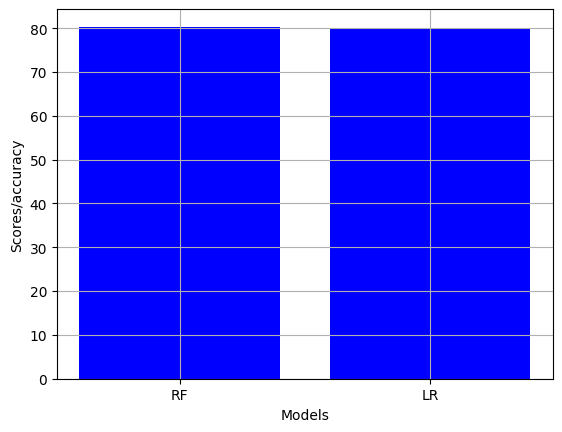

In [141]:
sc
col = ["RF","LR"]
col
plt.bar(col,sc,color='blue')
plt.xlabel('Models')
plt.ylabel('Scores/accuracy')
plt.grid()
plt.show()

In [157]:
churn = pd.DataFrame(ypred,columns=["Churn"])
churn.value_counts()
test_data['Churn'] = churn
test_data
test_data['Churn'].value_counts()
# test_data.to_csv('pred_on_test_data.csv',mode='w',index=False)

Churn
0    102006
1      2474
Name: count, dtype: int64

In [143]:
test_data

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42.0,Comedy,3.522724,2,Male,23,No,No
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43.0,Action,2.021545,2,Female,22,Yes,No
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14.0,Sci-Fi,4.806126,2,Female,22,No,Yes
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14.0,Comedy,4.943900,0,Female,23,Yes,Yes
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6.0,Drama,2.846880,6,Female,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104475,80,17.348236,1387.858873,Standard,Credit card,No,TV Shows,Yes,Mobile,19.189141,135.445204,35.0,Comedy,1.411831,7,Female,14,No,Yes
104476,20,8.275459,165.509180,Premium,Bank transfer,Yes,Movies,Yes,Mobile,30.986604,114.868640,17.0,Drama,2.783849,2,Male,8,Yes,No
104477,106,18.134343,1922.240365,Basic,Mailed check,No,Movies,Yes,Computer,7.236303,109.583153,31.0,Comedy,2.991527,1,Male,12,No,Yes
104478,46,19.774010,909.604454,Basic,Bank transfer,No,TV Shows,Yes,TV,25.809285,115.153570,1.0,Drama,4.998019,0,Female,12,Yes,No
